### Exploratory data analysis of crimes in LA 2010/2019

Ignacio Podestá

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max.columns', 100)
plt.style.use('Solarize_Light2')

In [2]:
df_comp = pd.read_csv('Crime_Data_from_2010_to_2019.csv')

In [3]:
df_comp.info() #variables and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060948 entries, 0 to 2060947
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [4]:
df_comp.head()    #first 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",0400,47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


#### Variables Names 


* DR_NO
* Date Rptd
* DATE OCC
* TIME OCC
* AREA
* AREA NAME
* Rpt Dist No
* Part 1-2
* Crm Cd
* Crm Cd Desc
* Mocodes
* Vict Age
* Vict Sex
* Vict Descent
* Premis Cd
* Premis Desc
* Weapon Used Cd
* Weapon Desc
* Status
* Status Desc
* Crm Cd 1
* Crm Cd 2
* Crm Cd 3
* Crm Cd 4
* LOCATION
* Cross Street
* LAT

In [5]:
# dropping columns without value
df = df_comp.drop(labels=['DR_NO', 'Date Rptd', 'Rpt Dist No', 'Crm Cd', 'Mocodes', 'Premis Cd', 'Weapon Used Cd', 'Status', 'Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4'], axis=1)

In [6]:
df.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street,LAT,LON
0,02/20/2010 12:00:00 AM,1350,13,Newton,2,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,NaN,Adult Arrest,300 E GAGE AV,NaN,33.9825,-118.2695
1,09/12/2010 12:00:00 AM,45,14,Pacific,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,NaN,Invest Cont,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,08/09/2010 12:00:00 AM,1515,13,Newton,2,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,NaN,Invest Cont,1300 E 21ST ST,NaN,34.0224,-118.2524
3,01/05/2010 12:00:00 AM,150,6,Hollywood,2,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,01/02/2010 12:00:00 AM,2100,1,Central,1,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488


### Null analysis

<AxesSubplot:>

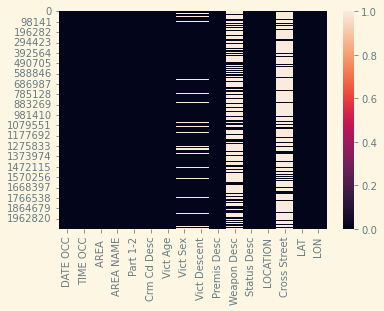

In [7]:
sns.heatmap(df.isna())    # where are the null values

### Variable Vict Sex

In [8]:
#creating categories
df['Vict Sex'].unique()

array(['M', 'F', nan, 'X', 'H', '-', 'N'], dtype=object)

In [9]:
df.loc[df['Vict Sex'].isin(['X',None,'H']), 'Vict Sex'] = 'U'      # U Unknown

In [10]:
df['Vict Sex'].unique()                                            # checking

array(['M', 'F', nan, 'U', '-', 'N'], dtype=object)

In [11]:
df['Vict Sex'].value_counts()

M    941280
F    851605
U     66580
N        17
-         1
Name: Vict Sex, dtype: int64

#### Variable Vict Descent
* A - Other Asian
* B - Black 
* C - Chinese
* D - Cambodian 
* F - Filipino 
* G - Guamanian 
* H - Hispanic/Latin/Mexican 
* I - American Indian/Alaskan Native 
* J - Japanese 
* K - Korean 
* L - Laotian 
* O - Other 
* P - Pacific Islander 
* S - Samoan 
* U - Hawaiian 
* V - Vietnamese 
* W - White 
* X - Unknown 
* Z - Asian Indian

In [12]:
df['Vict Descent'].unique()

array(['H', 'W', 'B', 'A', 'O', 'X', 'K', nan, 'I', 'J', 'F', 'C', 'P',
       'V', 'U', 'G', 'D', 'S', 'Z', 'L', '-'], dtype=object)

In [13]:
df['Vict Descent'].isna().value_counts()

False    1859440
True      201508
Name: Vict Descent, dtype: int64

In [14]:
df.loc[df['Vict Descent'].isin([None, 'X']), 'Vict Descent'] = 'O'   # Juntamos a los NA con la categoría O-Other y X-Unknown

In [15]:
df['Vict Descent'].unique()

array(['H', 'W', 'B', 'A', 'O', 'K', nan, 'I', 'J', 'F', 'C', 'P', 'V',
       'U', 'G', 'D', 'S', 'Z', 'L', '-'], dtype=object)

In [16]:
df['Vict Descent'].value_counts()

H    699431
W    487037
B    324406
O    283076
A     49326
K      8845
F      3078
C      1385
I      1008
J       590
P       343
V       333
U       218
Z       182
G        92
S        34
D        30
L        24
-         2
Name: Vict Descent, dtype: int64

### Variable Vict Age

In [17]:
df['Vict Age'].unique()

array([ 48,   0,  47,  23,  46,  51,  30,  55,  38,  40,  24,  29,  41,
        11,  50,  18,  37,  28,  25,  31,  36,  61,  27,  32,  45,  22,
        35,  44,  20,  33,  26,  52,  62,  39,  54,  76,  16,  21,  57,
        34,  65,   5,  49,  58,  56,  59,  42,   9,  60,  92,  43,  19,
        15,  17,  63,  83,   6,  13,  12,   7,  53,  10,  99,  74,  84,
        68,  82,  66,  64,  14,  69,  70,  71,  73,  78,  67,  80,  81,
        72,  86,  79,  75,  77,   2,   4,   8,  93,  85,   3,  91,  89,
        87,  90,  88,  96,  95,  97,  98,  94,  -3,  -1,  -6,  -8,  -5,
        -2,  -9,  -4, -10, -11,  -7, 120, 114, 118], dtype=int64)

In [18]:
df['Vict Age'].value_counts()

 0      376565
 25      46321
 26      45825
 27      45591
 28      45468
         ...  
-10          2
-11          1
 120         1
 114         1
 118         1
Name: Vict Age, Length: 113, dtype: int64

In [19]:
df[df['Vict Age']==120] #Outlier

,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street,LAT,LON
552830,04/19/2020 12:00:00 AM,2145,8,West LA,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",120,NaN,NaN,STREET,SEMI-AUTOMATIC PISTOL,Invest Cont,2000 S BEDFORD ST,NaN,34.0416,-118.3836


In [20]:
df.loc[df['Vict Age'].isin([-1,120]), 'Vict Age'] = 0   # Le ponemos el valor numérico 0, que ya tiene valores. Suponemos que son datos desconocidos. 

In [21]:
df['Vict Age'].unique()

array([ 48,   0,  47,  23,  46,  51,  30,  55,  38,  40,  24,  29,  41,
        11,  50,  18,  37,  28,  25,  31,  36,  61,  27,  32,  45,  22,
        35,  44,  20,  33,  26,  52,  62,  39,  54,  76,  16,  21,  57,
        34,  65,   5,  49,  58,  56,  59,  42,   9,  60,  92,  43,  19,
        15,  17,  63,  83,   6,  13,  12,   7,  53,  10,  99,  74,  84,
        68,  82,  66,  64,  14,  69,  70,  71,  73,  78,  67,  80,  81,
        72,  86,  79,  75,  77,   2,   4,   8,  93,  85,   3,  91,  89,
        87,  90,  88,  96,  95,  97,  98,  94,  -3,  -6,  -8,  -5,  -2,
        -9,  -4, -10, -11,  -7, 114, 118], dtype=int64)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060948 entries, 0 to 2060947
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   DATE OCC      object 
 1   TIME OCC      int64  
 2   AREA          int64  
 3   AREA NAME     object 
 4   Part 1-2      int64  
 5   Crm Cd Desc   object 
 6   Vict Age      int64  
 7   Vict Sex      object 
 8   Vict Descent  object 
 9   Premis Desc   object 
 10  Weapon Desc   object 
 11  Status Desc   object 
 12  LOCATION      object 
 13  Cross Street  object 
 14  LAT           float64
 15  LON           float64
dtypes: float64(2), int64(4), object(10)
memory usage: 251.6+ MB


### Variable Weapon Desc

In [23]:
df['Weapon Desc'].unique()

array([nan, 'HAND GUN', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT', 'SIMULATED GUN',
       'FOLDING KNIFE', 'OTHER KNIFE', 'MACE/PEPPER SPRAY', 'STICK',
       'UNKNOWN FIREARM', 'SWITCH BLADE',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'BOARD', 'BLUNT INSTRUMENT',
       'SEMI-AUTOMATIC PISTOL', 'VEHICLE', 'OTHER CUTTING INSTRUMENT',
       'SCISSORS', 'BOTTLE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'BELT FLAILING INSTRUMENT/CHAIN',
       'AUTOMATIC WEAPON/SUB-MACHINE GUN', 'CLUB/BAT', 'BRASS KNUCKLES',
       'KITCHEN KNIFE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'SCREWDRIVER',
       'FIRE', 'STUN GUN', 'RIFLE', 'RAZOR BLADE', 'DIRK/DAGGER',
       'CAUSTIC CHEMICAL/POISON', 'SHOTGUN', 'ICE PICK', 'BOMB THREAT',
       'ROCK/THROWN OBJECT', 'REVOLVER', 'OTHER FIREARM', 'DEMAND NOTE',
       'BOWIE KNIFE', 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE',
       'SCALDING LIQUID', 'ROPE/LIGATURE', 'MACHETE', 'T

In [24]:
df.loc[df['Weapon Desc'].isna(), 'Weapon Desc'] = 'UNKNOWN WEAPON/OTHER WEAPON' 

### Variable Cross Street

In [25]:
df['Cross Street'].unique()

array([nan, 'MANCHESTER                   AV',
       'HOLLYWOOD                    BL', ...,
       'S  BIXEL                        ST',
       'E  MATEO                        ST',
       'EDGEWATER                    AV'], dtype=object)

In [26]:
df.loc[df['Cross Street'].isin([0, None]), 'Cross Street'] = 'UNKNOWN'

### Variable Premis Desc

In [27]:
df['Premis Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'STREET', 'ALLEY', 'DEPARTMENT STORE',
       'OTHER PREMISE', 'PARKING LOT', 'SIDEWALK', 'LIBRARY',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'RESTAURANT/FAST FOOD', 'BAR/COCKTAIL/NIGHTCLUB', 'HOTEL',
       'OTHER BUSINESS', 'OTHER STORE',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)',
       'VEHICLE, PASSENGER/TRUCK',
       'MUNICIPAL BUS LINE INCLUDES LADOT/DASH', 'PAWN SHOP',
       'OTHER RESIDENCE', 'JEWELRY STORE', 'WAREHOUSE',
       'SPECIALTY SCHOOL/OTHER',
       'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)', 'BUS STOP',
       'OFFICE BUILDING/OFFICE', 'CONSTRUCTION SITE',
       'PARKING UNDERGROUND/BUILDING', 'HOSPITAL', 'DRIVEWAY',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'DRUG STORE', 'LIQUOR STORE',
       'BANK', 'MARKET', 'TRAIN DEPOT/TERMINAL, OTHER THAN MTA',
       'PUBLIC RESTROOM/OUTSIDE*', 'PARK/PLAYGROUND', 'POLICE FACILITY',
       'SPORTS ARENA', 'ELEVATOR', 'CLOTHING STORE', 'HIGH S

In [28]:
df['Premis Desc'].isna().sum()

261

In [29]:
df.loc[df['Premis Desc'].isna(),'Premis Desc'] = 'UNKNOWN'

### Transforming date

In [30]:
df['DATE OCC'].unique()

array(['02/20/2010 12:00:00 AM', '09/12/2010 12:00:00 AM',
       '08/09/2010 12:00:00 AM', ..., '08/07/2019 12:00:00 AM',
       '10/13/2019 12:00:00 AM', '11/08/2019 12:00:00 AM'], dtype=object)

In [31]:
date = df['DATE OCC'].str.split(expand=True)    #split DATE OCC

In [32]:
date.head()

,0,1,2
0,02/20/2010,12:00:00,AM
1,09/12/2010,12:00:00,AM
2,08/09/2010,12:00:00,AM
3,01/05/2010,12:00:00,AM
4,01/02/2010,12:00:00,AM


In [33]:
date.columns = ['Date', 'Time', 'AM']

In [34]:
date = pd.to_datetime(date['Date'])            

In [35]:
df = pd.concat([df, date], axis=1)             

In [36]:
df = df.drop(labels=['DATE OCC'], axis=1)       

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060948 entries, 0 to 2060947
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   TIME OCC      int64         
 1   AREA          int64         
 2   AREA NAME     object        
 3   Part 1-2      int64         
 4   Crm Cd Desc   object        
 5   Vict Age      int64         
 6   Vict Sex      object        
 7   Vict Descent  object        
 8   Premis Desc   object        
 9   Weapon Desc   object        
 10  Status Desc   object        
 11  LOCATION      object        
 12  Cross Street  object        
 13  LAT           float64       
 14  LON           float64       
 15  Date          datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 251.6+ MB


In [38]:
df.head()

,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street,LAT,LON,Date
0,1350,13,Newton,2,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20
1,45,14,Pacific,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-12
2,1515,13,Newton,2,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09
3,150,6,Hollywood,2,VIOLATION OF COURT ORDER,47,F,W,STREET,HAND GUN,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05
4,2100,1,Central,1,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-02


### Transforming time

In [39]:
time=[]
for rows in df['TIME OCC'].iteritems():
    if len(str(rows[1]))==3:                
        time.append('0'+str(rows[1]))       
    elif len(str(rows[1]))==4:              
        time.append(str(rows[1]))           
    else:
        time.append('0000')                 

In [40]:
df_time = pd.DataFrame(time)

In [41]:
df_time

,0
0,1350
1,0000
2,1515
3,0150
4,2100
...,...
2060943,0400
2060944,1810
2060945,2100
2060946,1800


In [42]:
df_time.columns = ['Time']

In [43]:
df_time = pd.to_datetime(df_time['Time'], format='%H%M')

In [44]:
df = pd.concat([df, df_time], axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060948 entries, 0 to 2060947
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   TIME OCC      int64         
 1   AREA          int64         
 2   AREA NAME     object        
 3   Part 1-2      int64         
 4   Crm Cd Desc   object        
 5   Vict Age      int64         
 6   Vict Sex      object        
 7   Vict Descent  object        
 8   Premis Desc   object        
 9   Weapon Desc   object        
 10  Status Desc   object        
 11  LOCATION      object        
 12  Cross Street  object        
 13  LAT           float64       
 14  LON           float64       
 15  Date          datetime64[ns]
 16  Time          datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(9)
memory usage: 267.3+ MB


In [46]:
df = df.drop(labels=['TIME OCC'], axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060948 entries, 0 to 2060947
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   AREA          int64         
 1   AREA NAME     object        
 2   Part 1-2      int64         
 3   Crm Cd Desc   object        
 4   Vict Age      int64         
 5   Vict Sex      object        
 6   Vict Descent  object        
 7   Premis Desc   object        
 8   Weapon Desc   object        
 9   Status Desc   object        
 10  LOCATION      object        
 11  Cross Street  object        
 12  LAT           float64       
 13  LON           float64       
 14  Date          datetime64[ns]
 15  Time          datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(9)
memory usage: 251.6+ MB


### Duplicated rows

In [48]:
dup = df.duplicated()

In [49]:
dup.value_counts()

False    1966664
True       94284
dtype: int64

In [50]:
df = df.drop_duplicates()

In [51]:
df.duplicated().value_counts()

False    1966664
dtype: int64

### Data Analysis

### Victim Age

In [52]:
age = df['Vict Age']

In [53]:
age = age[age>0]

Text(0.5, 1.0, 'Victim Age')

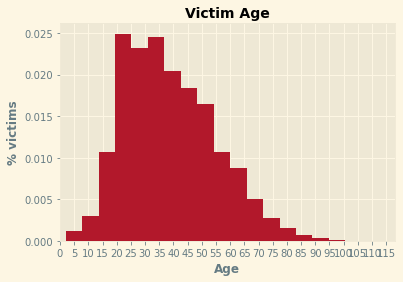

In [54]:
plt.hist(age, density=True, bins=20, facecolor='#b2182b')
plt.xlim(0, max(age))
plt.xticks(np.arange(0, max(age)+2, 5.0))
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('% victims', fontsize=12, fontweight='bold')
plt.title('Victim Age', fontsize=14, fontweight='bold')

In [55]:
age.describe()

count    1.615072e+06
mean     3.860248e+01
std      1.599043e+01
min      2.000000e+00
25%      2.600000e+01
50%      3.600000e+01
75%      5.000000e+01
max      1.180000e+02
Name: Vict Age, dtype: float64

In [56]:
age.mode()

0    25
dtype: int64

### Victim by gender

In [57]:
sex = df['Vict Sex'].value_counts(normalize=True)

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (3).

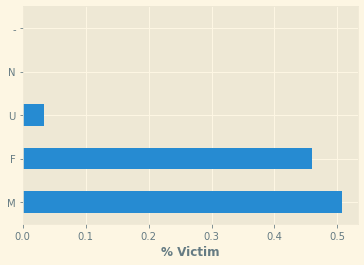

In [59]:
sex_plot = sex.plot.barh(color=['#a50026', '#66bd63', '#a6d96a'])
sex_plot.set_xlabel('% Victim', fontsize=12, fontweight='bold')
sex_plot.set_yticklabels(['Male', 'Woman', 'U'])
sex_plot.set_ylabel('Sex', fontsize=12, fontweight='bold')
sex_plot.set_title('Victim Sex', fontsize=14, fontweight='bold')

### Etnic of the victim



In [60]:
df.loc[~df['Vict Descent'].isin(['H','W','B']), 'Vict Descent'] = 'O'

In [61]:
etnia = df['Vict Descent'].value_counts(normalize=True)

Text(0.5, 1.0, 'Victims by etnic')

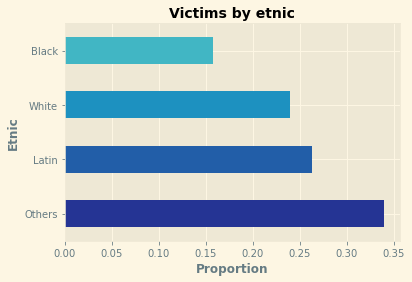

In [62]:
sex_plot = etnia.plot.barh(color=['#253494', '#225ea8', '#1d91c0', '#41b6c4'])
sex_plot.set_xlabel('Proportion', fontsize=12, fontweight='bold')
sex_plot.set_yticklabels(['Others', 'Latin', 'White', 'Black'])
sex_plot.set_ylabel('Etnic', fontsize=12, fontweight='bold')
sex_plot.set_title('Victims by etnic', fontsize=14, fontweight='bold')

### Victims by sex and type of crime


<AxesSubplot:xlabel='count', ylabel='Crm Cd Desc'>

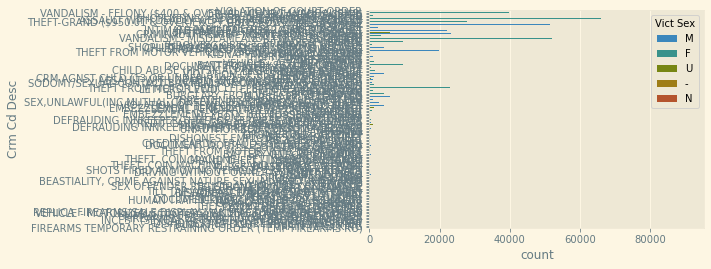

In [63]:
sns.countplot(y = 'Crm Cd Desc', hue = 'Vict Sex', data = df) #grouping types

In [64]:
df['Crm Cd Desc'].nunique()

142

In [65]:
df['Crm Cd Desc'].unique()

array(['VIOLATION OF COURT ORDER',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'BOMB SCARE',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY', 'ARSON',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING',
       'THEFT FROM MOTOR

In [66]:
df['Crm Cd Desc'].value_counts(normalize = True)

BATTERY - SIMPLE ASSAULT                                   9.015063e-02
VEHICLE - STOLEN                                           7.728010e-02
BURGLARY FROM VEHICLE                                      7.589604e-02
THEFT PLAIN - PETTY ($950 & UNDER)                         7.021026e-02
BURGLARY                                                   6.895128e-02
                                                               ...     
FIREARMS RESTRAINING ORDER (FIREARMS RO)                   2.033901e-06
BLOCKING DOOR INDUCTION CENTER                             1.016951e-06
DRUNK ROLL - ATTEMPT                                       5.084753e-07
TRAIN WRECKING                                             5.084753e-07
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)    5.084753e-07
Name: Crm Cd Desc, Length: 142, dtype: float64

In [67]:
df.loc[df['Crm Cd Desc'].str.contains('THEFT|ROBBERY|STOLEN|BURGLARY'), 'Crm Cd Desc'] = 'Robbery'
df.loc[df['Crm Cd Desc'].str.contains('ASSAULT'), 'Crm Cd Desc'] = 'Assault'
df.loc[df['Crm Cd Desc'].str.contains('RAPE|SEXUAL|INTIMATE|SEX'), 'Crm Cd Desc'] = 'Rape'
df.loc[df['Crm Cd Desc'].str.contains('BURGLARY FROM VEHICLE|VEHICLE'), 'Crm Cd Desc'] = 'Burglary from vehicle'
df.loc[df['Crm Cd Desc'].str.contains('HOMICIDE'), 'Crm Cd Desc'] = 'Homicide'
df.loc[df['Crm Cd Desc'].str.contains('CHILD'), 'Crm Cd Desc'] = 'Child'
df.loc[df['Crm Cd Desc'].str.contains('VANDALISM'), 'Crm Cd Desc'] = 'Vandalism'
df.loc[df['Crm Cd Desc'].str.contains('THREATS'), 'Crm Cd Desc'] = 'Threats'
df.loc[df['Crm Cd Desc'].str.contains('BRANDISH WEAPON'), 'Crm Cd Desc'] = 'Brandish weapon'

In [68]:
df['Crm Cd Desc'].nunique()

80

In [69]:
df['Crm Cd Desc'].value_counts()

Robbery                                                    1102401
Assault                                                     403729
Vandalism                                                   186220
Threats                                                      51681
Rape                                                         31182
                                                            ...   
FIREARMS RESTRAINING ORDER (FIREARMS RO)                         4
BLOCKING DOOR INDUCTION CENTER                                   2
DRUNK ROLL - ATTEMPT                                             1
TRAIN WRECKING                                                   1
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)          1
Name: Crm Cd Desc, Length: 80, dtype: int64

In [70]:
commoncrimes = df['Crm Cd Desc'].value_counts(normalize = True)[:10].index.to_list()

In [71]:
print(commoncrimes)

['Robbery', 'Assault', 'Vandalism', 'Threats', 'Rape', 'TRESPASSING', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'OTHER MISCELLANEOUS CRIME', 'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF COURT ORDER']


In [72]:
df.loc[~(df['Crm Cd Desc'].isin(commoncrimes)),'Crm Cd Desc'] = 'Others'

In [73]:
df.loc[df['Crm Cd Desc'].str.contains('TRESPASSING'), 'Crm Cd Desc'] = 'Trespassing'
df.loc[df['Crm Cd Desc'].str.contains('VIOLATION OF RESTRAINING ORDER'), 'Crm Cd Desc'] = 'Violation of restraining order'
df.loc[df['Crm Cd Desc'].str.contains('OTHER MISCELLANEOUS CRIME|LETTERS, LEWD  -  TELEPHONE CALLS, LEWD'), 'Crm Cd Desc'] = 'Others'

In [75]:
male_o_fem = df[df['Vict Sex'].isin(['F', 'M'])] 

Text(0.5, 1.0, 'Crime type by sex')

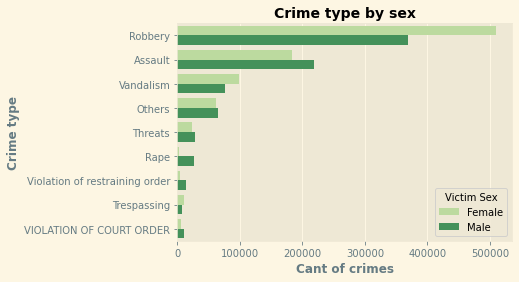

In [76]:

plot = sns.countplot(y = 'Crm Cd Desc', hue = 'Vict Sex', data = male_o_fem, order = male_o_fem['Crm Cd Desc'].value_counts().index, palette='YlGn')
plot.set_ylabel('Crime type', fontsize=12, fontweight='bold')
plot.set_xlabel('Cant of crimes', fontsize=12, fontweight='bold')
plot.legend(labels = ['Female', 'Male'], title = 'Victim Sex')
plot.set_title('Crime type by sex', fontsize=14, fontweight='bold')

### Characterization of crimes by month in 2020

In [77]:
df['year'] = df['Date'].apply(lambda x: x.year)

In [78]:
df['year']

0          2010
1          2010
2          2010
3          2010
4          2010
           ... 
2060943    2019
2060944    2019
2060945    2019
2060946    2019
2060947    2019
Name: year, Length: 1966664, dtype: int64

In [79]:
df_2020 = df[df['year'] == 2020].copy()

In [80]:
df_2020['year'].value_counts()

2020    73912
Name: year, dtype: int64

In [81]:
df_2020['Month'] = df['Date'].apply(lambda x: x.month)

In [82]:
df_2020['Month']

409975      9
409977     10
409985      1
409987     11
409992      3
           ..
1382925     5
1382927     6
1382932     2
1382952     8
1382968     4
Name: Month, Length: 73912, dtype: int64

In [83]:
df_months = df_2020.groupby('Month').size()

In [84]:
df_months

Month
1     7046
2     6517
3     6132
4     6195
5     6594
6     6768
7     6704
8     6579
9     6045
10    5569
11    5094
12    4669
dtype: int64

In [85]:
df_months.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec']

In [86]:
df_months

Jan    7046
Feb    6517
Mar    6132
Apr    6195
May    6594
Jun    6768
Jul    6704
Ago    6579
Sep    6045
Oct    5569
Nov    5094
Dec    4669
dtype: int64

In [ ]:
plot_months = sns.lineplot(x = df_months.index, y = df_months.values, marker = 'o', color='#b2182b')
plot_months.set_ylabel('Number of crimes', fontsize=12, fontweight='bold')
plot_months.set_xlabel('Month', fontsize=12, fontweight='bold')
plot_months.set_title('Number of crimes by month', fontsize=14, fontweight='bold')

### Characterization of crimes by hour in 2020

In [87]:
df_2020['hour'] = df_2020['Time'].apply(lambda x: x.hour)

In [88]:
df_2020['hour'].value_counts()

12    4738
18    4688
17    4584
20    4268
19    4114
16    4057
15    4009
21    3868
14    3708
22    3608
13    3359
11    3172
23    3081
10    3047
0     2805
8     2716
9     2589
1     2166
2     1874
7     1757
3     1608
6     1420
4     1392
5     1284
Name: hour, dtype: int64

In [89]:
df_2020.drop(df_2020[df_2020['hour'] == 0].index, inplace = True)

In [90]:
df_hours = df_2020.groupby('hour').size()

In [91]:
df_hours

hour
1     2166
2     1874
3     1608
4     1392
5     1284
6     1420
7     1757
8     2716
9     2589
10    3047
11    3172
12    4738
13    3359
14    3708
15    4009
16    4057
17    4584
18    4688
19    4114
20    4268
21    3868
22    3608
23    3081
dtype: int64

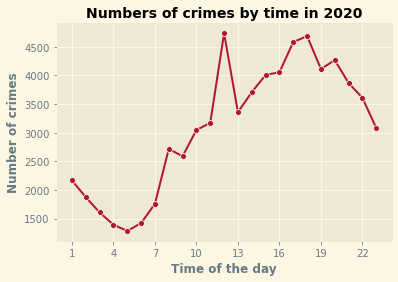

In [92]:
plot_hours = sns.lineplot(x = df_hours.index, y = df_hours.values, marker = 'o', color='#b2182b')
plot_hours.set_ylabel('Number of crimes', fontsize=12, fontweight='bold')
plot_hours.set_xlabel('Time of the day', fontsize=12, fontweight='bold')
plot_hours.set_title('Numbers of crimes by time in 2020', fontsize=14, fontweight='bold')
plot_hours.set_xticks(range(1, 24, 3))